# CS724: Assignment 1
### Krishanu Ray, 241110037
<hr>


## Question 2
Importing necessary libraries below. Numpy for linear algebra operations, random to generate random numbers and matplotlib for plotting.

As stated in the question let "user" represent the position of the user which will be (100,100,100). Let s1,s2,s3,s4,s5 represent the positions of 5 satellites whose positions are given below. Let "c" represent the speed of light in m/s.

In [7]:
import numpy as np
import random
import matplotlib.pyplot as plt

user = np.array([100,100,100])
s1 = np.array([25,50,75])
s2= np.array([130,160,190])
s3 = np.array([200,275,250])
s4= np.array([75,150,300])
s5 = np.array([45,90,180])
c = 300000000

## 2-a) 
Let us define a function to calculate time named calc_time which takes the user position, satellite position and speed of light as input and returns the time to send/receive a signal. We store the time values in nanoseconds in t1,t2,t3,t4 and t5 corresponding to each satellite.


In [8]:
#2-a
def calc_time(usr,sat,speed):
    dist=0
    for i in range(3):
        dist+=(usr[i]-sat[i])**2
    dist = dist**0.5
    return dist/speed

t1 = calc_time(user,s1,c)*10**9
t2 = calc_time(user,s2,c)*10**9
t3 = calc_time(user,s3,c)*10**9
t4 = calc_time(user,s4,c)*10**9
t5 = calc_time(user,s5,c)*10**9
print(f"Time taken from satellite 1 is {t1} ns")
print(f"Time taken from satellite 2 is {t2} ns")
print(f"Time taken from satellite 3 is {t3} ns")
print(f"Time taken from satellite 4 is {t4} ns")
print(f"Time taken from satellite 5 is {t5} ns")

Time taken from satellite 1 is 311.80478223116177 ns
Time taken from satellite 2 is 374.1657386773942 ns
Time taken from satellite 3 is 837.4896350934075 ns
Time taken from satellite 4 is 692.218655243173 ns
Time taken from satellite 5 is 325.32035493238556 ns


## 2-b) 
Let di be the distance between user and satellite i which is calculated from the time. We do the reverse operation by making matrix A and B and solve the equation AX=B. We use the direct formula X = (A<sup>T</sup>A)<sup>-1</sup>A<sup>T</sup>B.

In [9]:
#2-b
d1 = t1*c/10**9
d2 = t2*c/10**9
d3 = t3*c/10**9
d4 = t4*c/10**9
d5 = t5*c/10**9
A=np.array([[2*(s2[0]-s1[0]),2*(s2[1]-s1[1]),2*(s2[2]-s1[2])],
            [2*(s3[0]-s2[0]),2*(s3[1]-s2[1]),2*(s3[2]-s2[2])],
            [2*(s4[0]-s3[0]),2*(s4[1]-s3[1]),2*(s4[2]-s3[2])],
            [2*(s5[0]-s4[0]),2*(s5[1]-s4[1]),2*(s5[2]-s4[2])]])
B=np.array([[(d1**2-d2**2)-(s1[0]**2-s2[0]**2)-(s1[1]**2-s2[1]**2)-(s1[2]**2-s2[2]**2)],
            [(d2**2-d3**2)-(s2[0]**2-s3[0]**2)-(s2[1]**2-s3[1]**2)-(s2[2]**2-s3[2]**2)],
            [(d3**2-d4**2)-(s3[0]**2-s4[0]**2)-(s3[1]**2-s4[1]**2)-(s3[2]**2-s4[2]**2)],
            [(d4**2-d5**2)-(s4[0]**2-s5[0]**2)-(s4[1]**2-s5[1]**2)-(s4[2]**2-s5[2]**2)]])
X = np.matmul(np.linalg.inv(np.matmul(A.T,A)),np.matmul(A.T,B))

print(f"Actual location of user is ({user[0]},{user[1]},{user[2]})")
print(f"Estimated location of user without any error is ({X[0]},{X[1]},{X[2]})")

Actual location of user is (100,100,100)
Estimated location of user without any error is ([100.],[100.],[100.])


## 2-c)
Let us introduce random errors in each time. I used randInt to generate errors in the range of -10 to +10 and modified each time and then applied the same matrix formula to estimate user location.

In [10]:
#2-c
new_t1 = t1 + random.randint(-10,10)
new_t2 = t2 + random.randint(-10,10)
new_t3 = t3 + random.randint(-10,10)
new_t4 = t4 + random.randint(-10,10)
new_t5 = t5 + random.randint(-10,10)

print(f"Time taken from satellite 1 with random errors is {new_t1} ns. Difference with actual time is {new_t1-t1} ns.")
print(f"Time taken from satellite 2 with random errors is {new_t2} ns. Difference with actual time is {new_t2-t2} ns.")
print(f"Time taken from satellite 3 with random errors is {new_t3} ns. Difference with actual time is {new_t3-t3} ns.")
print(f"Time taken from satellite 4 with random errors is {new_t4} ns. Difference with actual time is {new_t4-t4} ns.")
print(f"Time taken from satellite 5 with random errors is {new_t5} ns. Difference with actual time is {new_t5-t5} ns.\n")

new_d1 = new_t1*c/10**9
new_d2 = new_t2*c/10**9
new_d3 = new_t3*c/10**9
new_d4 = new_t4*c/10**9
new_d5 = new_t5*c/10**9
new_A=np.array([[2*(s2[0]-s1[0]),2*(s2[1]-s1[1]),2*(s2[2]-s1[2])],
                [2*(s3[0]-s2[0]),2*(s3[1]-s2[1]),2*(s3[2]-s2[2])],
                [2*(s4[0]-s3[0]),2*(s4[1]-s3[1]),2*(s4[2]-s3[2])],
                [2*(s5[0]-s4[0]),2*(s5[1]-s4[1]),2*(s5[2]-s4[2])]])
new_B=np.array([[(new_d1**2-new_d2**2)-(s1[0]**2-s2[0]**2)-(s1[1]**2-s2[1]**2)-(s1[2]**2-s2[2]**2)],
                [(new_d2**2-new_d3**2)-(s2[0]**2-s3[0]**2)-(s2[1]**2-s3[1]**2)-(s2[2]**2-s3[2]**2)],
                [(new_d3**2-new_d4**2)-(s3[0]**2-s4[0]**2)-(s3[1]**2-s4[1]**2)-(s3[2]**2-s4[2]**2)],
                [(new_d4**2-new_d5**2)-(s4[0]**2-s5[0]**2)-(s4[1]**2-s5[1]**2)-(s4[2]**2-s5[2]**2)]])
new_X = np.matmul(np.linalg.inv(np.matmul(new_A.T,new_A)),np.matmul(new_A.T,new_B))
new_X = new_X.reshape(3,)

localized_error = (new_X[0]-user[0])**2 + (new_X[1]-user[1])**2 + (new_X[2]-user[2])**2
localized_error = localized_error**0.5

print(f"Actual location of user was ({user[0]},{user[1]},{user[2]})")
print(f"New estimated location of user after introducing error is ({new_X[0]},{new_X[1]},{new_X[2]})")
print(f"Localization error is {localized_error} metres")

Time taken from satellite 1 with random errors is 318.80478223116177 ns. Difference with actual time is 7.0 ns.
Time taken from satellite 2 with random errors is 366.1657386773942 ns. Difference with actual time is -8.0 ns.
Time taken from satellite 3 with random errors is 834.4896350934075 ns. Difference with actual time is -3.0 ns.
Time taken from satellite 4 with random errors is 691.218655243173 ns. Difference with actual time is -1.0 ns.
Time taken from satellite 5 with random errors is 316.32035493238556 ns. Difference with actual time is -9.0 ns.

Actual location of user was (100,100,100)
New estimated location of user after introducing error is (111.56234352140447,90.99595598224525,101.37005472348845)
Localization error is 14.718615638910546 metres


## 2-d)
Defining a function named "avg_err" to find the average localization error since we have to run it multiple times and average it out. It takes parameters like:
* The signal time from 5 satellites(which I have made a list named "travel_times")
* Error mean point (which specifies the range of error to introduce i.e 5 less and 5 more from the mean point)
* Position of satellites(which is a matrix named "sat_pos")
* User position
* Speed of light. 

This function calculates the random errors around the mean point 20 times and returns the average localized error.

In [11]:
#2-d
travel_times = [t1,t2,t3,t4,t5]
sat_pos = np.vstack((s1,s2,s3,s4,s5))
def avg_err(travel_times,error_mean,sats,user,c):
    err = []
    sum = 0
    for i in range(20):
        t1 = travel_times[0] + random.randint(error_mean-5,error_mean+5)
        t2 = travel_times[1] + random.randint(error_mean-5,error_mean+5)
        t3 = travel_times[2] + random.randint(error_mean-5,error_mean+5)
        t4 = travel_times[3] + random.randint(error_mean-5,error_mean+5)
        t5 = travel_times[4] + random.randint(error_mean-5,error_mean+5)
        new_d1 = t1*c/10**9
        new_d2 = t2*c/10**9
        new_d3 = t3*c/10**9
        new_d4 = t4*c/10**9
        new_d5 = t5*c/10**9
        s1 = sats[0]
        s2 = sats[1]
        s3 = sats[2]
        s4 = sats[3]
        s5 = sats[4]
        
        new_A=np.array([[2*(s2[0]-s1[0]),2*(s2[1]-s1[1]),2*(s2[2]-s1[2])],
                        [2*(s3[0]-s2[0]),2*(s3[1]-s2[1]),2*(s3[2]-s2[2])],
                        [2*(s4[0]-s3[0]),2*(s4[1]-s3[1]),2*(s4[2]-s3[2])],
                        [2*(s5[0]-s4[0]),2*(s5[1]-s4[1]),2*(s5[2]-s4[2])]])
        new_B=np.array([[(new_d1**2-new_d2**2)-(s1[0]**2-s2[0]**2)-(s1[1]**2-s2[1]**2)-(s1[2]**2-s2[2]**2)],
                        [(new_d2**2-new_d3**2)-(s2[0]**2-s3[0]**2)-(s2[1]**2-s3[1]**2)-(s2[2]**2-s3[2]**2)],
                        [(new_d3**2-new_d4**2)-(s3[0]**2-s4[0]**2)-(s3[1]**2-s4[1]**2)-(s3[2]**2-s4[2]**2)],
                        [(new_d4**2-new_d5**2)-(s4[0]**2-s5[0]**2)-(s4[1]**2-s5[1]**2)-(s4[2]**2-s5[2]**2)]])
        new_X = np.matmul(np.linalg.inv(np.matmul(new_A.T,new_A)),np.matmul(new_A.T,new_B))
        new_X = new_X.reshape(3,)

        error = (new_X[0]-user[0])**2 + (new_X[1]-user[1])**2 + (new_X[2]-user[2])**2
        error = error**0.5
        err.append(error)
    for e in err:
        sum = sum + e
    return sum/20


### Important assumptions
* Since distance between user and each satellites are different, the error introduced in their respective signal times would also be different.
* In order to plot the graph, I have assumed that the errors will be within a range of 5 units around the mean point(5 less and 5 more than mean point) and I assumed that average of those errors will still be the mean point itself and that will be my X coordinates.
* Example: Mean point 5 means errors generated will be in the range of [0,10], Mean point 15 means errors generated will be in the range of [10,20] and so on
* I will iterate over 20 mean points starting from 5 and step size of 10, generating errors around their ranges and my plotting coordinates will be (mean point,error)

List of localization errors(y):
[np.float64(7.538466751852892), np.float64(18.580169250979147), np.float64(33.3485418069324), np.float64(49.874398145563546), np.float64(59.0566306655234), np.float64(68.88112970666282), np.float64(87.58877510398945), np.float64(99.95458402944477), np.float64(109.29811757720124), np.float64(121.73444002556428), np.float64(137.20152636526313), np.float64(149.19779170008837), np.float64(155.4430551728687), np.float64(172.95974592169864), np.float64(189.50161895433288), np.float64(197.58568137463067), np.float64(212.4688929822583), np.float64(225.67821175603325), np.float64(235.56544663431018), np.float64(247.66703968207244)]

Error mean points(x):
[5, 15, 25, 35, 45, 55, 65, 75, 85, 95, 105, 115, 125, 135, 145, 155, 165, 175, 185, 195]


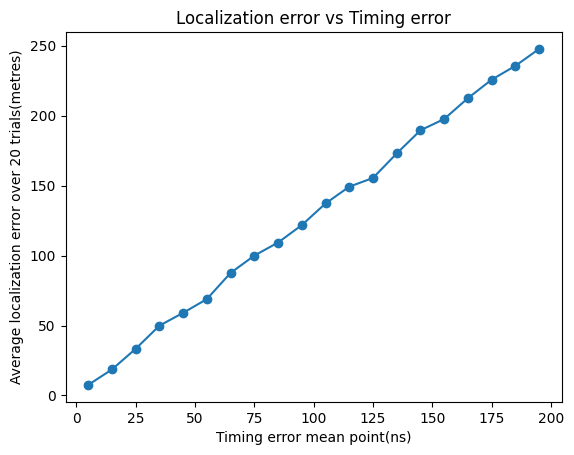

In [12]:
avg_Y = []
mean_X = []

for i in range(5,200,10):
    temp = avg_err(travel_times,i,sat_pos,user,c)
    avg_Y.append(temp)
    mean_X.append(i)

print("List of localization errors(y):")
print(avg_Y)
print("\nError mean points(x):")
print(mean_X)

plt.plot(mean_X,avg_Y,marker='o')
plt.xlabel("Timing error mean point(ns)")
plt.ylabel("Average localization error over 20 trials(metres)")
plt.title("Localization error vs Timing error")
plt.show()